## Importing the dataset and reading its details

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

patients_data = pd.read_csv('heart_2022_with_nans.csv')
patients_data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233455,Nebraska,Male,Excellent,0.0,0.0,Within past 5 years (2 years but less than 5 y...,Yes,7.0,1 to 5,No,...,1.57,66.68,26.89,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
233456,Nebraska,Male,Good,0.0,0.0,5 or more years ago,Yes,9.0,1 to 5,No,...,1.68,72.57,25.82,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
233457,Nebraska,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,63.50,21.93,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
233458,Nebraska,Male,Good,20.0,0.0,5 or more years ago,No,7.0,1 to 5,No,...,1.78,104.33,33.00,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


### Info about quantitative variables

In [2]:
patients_data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,227713.000000,228686.000000,230670.000000,218805.000000,211963.000000,208386.000000
mean,4.299342,4.350349,7.027888,1.703661,83.050730,28.486823
std,8.643600,8.357279,1.510295,0.107201,21.474511,6.548886
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.150000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.030000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.410000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.660000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.340000


## Dataset treatment

### Drop irrelevant columns

In [3]:
patients_data = patients_data.drop(columns=['State'], axis=1)
patients_data.isnull().sum()

,0
Sex,0
GeneralHealth,632
PhysicalHealthDays,5747
MentalHealthDays,4774
LastCheckupTime,4347
PhysicalActivities,605
SleepHours,2790
RemovedTeeth,6497
HadHeartAttack,1673
HadAngina,2407


Reading the info again

In [4]:
patients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233460 entries, 0 to 233459
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        233460 non-null  object 
 1   GeneralHealth              232828 non-null  object 
 2   PhysicalHealthDays         227713 non-null  float64
 3   MentalHealthDays           228686 non-null  float64
 4   LastCheckupTime            229113 non-null  object 
 5   PhysicalActivities         232855 non-null  object 
 6   SleepHours                 230670 non-null  float64
 7   RemovedTeeth               226963 non-null  object 
 8   HadHeartAttack             231787 non-null  object 
 9   HadAngina                  231053 non-null  object 
 10  HadStroke                  232608 non-null  object 
 11  HadAsthma                  232492 non-null  object 
 12  HadSkinCancer              231739 non-null  object 
 13  HadCOPD                    23

### Label Encoder

In [11]:
encoded_patients_data = patients_data.copy()
np.shape(encoded_patients_data)

(233460, 39)

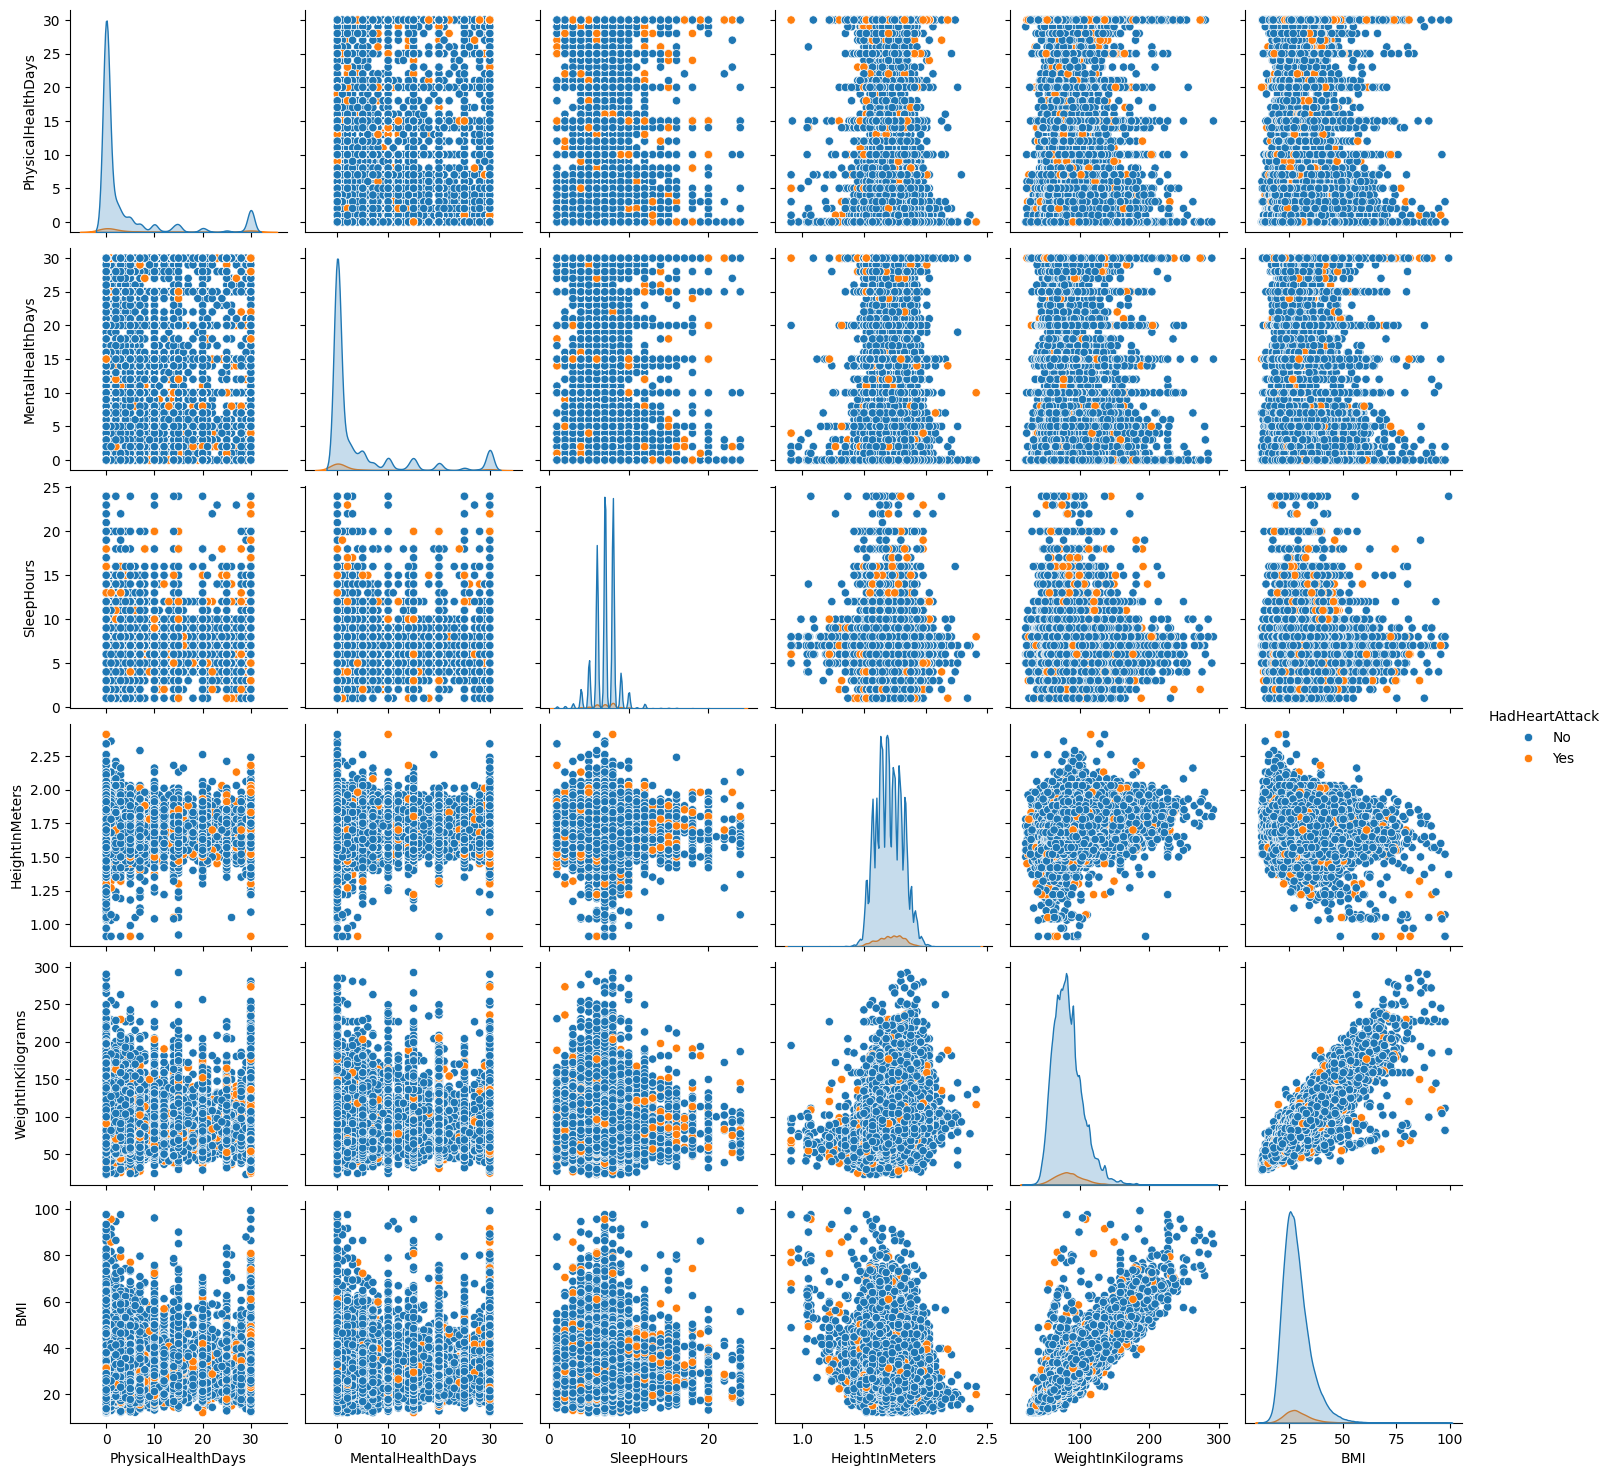

In [6]:
sns.pairplot(encoded_patients_data, hue='HadHeartAttack');

In [12]:
label_encoder_general_health = LabelEncoder()

mean = encoded_patients_data['GeneralHealth'].dropna().mode()[0]
encoded_patients_data['GeneralHealth'] = encoded_patients_data['GeneralHealth'].fillna(mean)

encoded_patients_data['GeneralHealth'] = label_encoder_general_health.fit_transform(encoded_patients_data['GeneralHealth'])
encoded_patients_data['GeneralHealth'].unique()

array([4, 0, 1, 3, 2])

In [13]:
label_encoder_sleep_hours = LabelEncoder()

mode = encoded_patients_data['SleepHours'].dropna().mode()[0]
encoded_patients_data['SleepHours'] = encoded_patients_data['SleepHours'].fillna(mode)

encoded_patients_data['SleepHours'] = label_encoder_sleep_hours.fit_transform(encoded_patients_data['SleepHours'])
encoded_patients_data['SleepHours'].unique()

array([ 7,  5,  4,  6,  8,  3,  9,  0, 11, 17,  2,  1, 10, 15, 14, 12, 13,
       19, 22, 16, 23, 21, 18, 20])

In [14]:
encoded_patients_data = encoded_patients_data.dropna()

label_encoder_sex = LabelEncoder()
encoded_patients_data['Sex'] = label_encoder_sex.fit_transform(encoded_patients_data['Sex'])

label_encoder_checkup_time = LabelEncoder()
encoded_patients_data['LastCheckupTime'] = label_encoder_checkup_time.fit_transform(encoded_patients_data['LastCheckupTime'])

label_encoder_sleep_hours = LabelEncoder()
encoded_patients_data['SleepHours'] = label_encoder_sleep_hours.fit_transform(encoded_patients_data['SleepHours'])

label_encoder_removed_teeth = LabelEncoder()
encoded_patients_data['RemovedTeeth'] = label_encoder_removed_teeth.fit_transform(encoded_patients_data['RemovedTeeth'])

label_encoder_had_heart_attack = LabelEncoder()
encoded_patients_data['HadHeartAttack'] = label_encoder_had_heart_attack.fit_transform(encoded_patients_data['HadHeartAttack'])

label_encoder_had_angina = LabelEncoder()
encoded_patients_data['HadAngina'] = label_encoder_had_angina.fit_transform(encoded_patients_data['HadAngina'])

label_encoder_had_stroke = LabelEncoder()
encoded_patients_data['HadStroke'] = label_encoder_had_stroke.fit_transform(encoded_patients_data['HadStroke'])

label_encoder_had_asthma = LabelEncoder()
encoded_patients_data['HadAsthma'] = label_encoder_had_asthma.fit_transform(encoded_patients_data['HadAsthma'])

label_encoder_had_skin_cancer = LabelEncoder()
encoded_patients_data['HadSkinCancer'] = label_encoder_had_skin_cancer.fit_transform(encoded_patients_data['HadSkinCancer'])

label_encoder_had_copd = LabelEncoder()
encoded_patients_data['HadCOPD'] = label_encoder_had_copd.fit_transform(encoded_patients_data['HadCOPD'])

label_encoder_had_depressive_disorder = LabelEncoder()
encoded_patients_data['HadDepressiveDisorder'] = label_encoder_had_depressive_disorder.fit_transform(encoded_patients_data['HadDepressiveDisorder'])

label_encoder_had_kidney_disease = LabelEncoder()
encoded_patients_data['HadKidneyDisease'] = label_encoder_had_kidney_disease.fit_transform(encoded_patients_data['HadKidneyDisease'])

label_encoder_had_arthritis = LabelEncoder()
encoded_patients_data['HadArthritis'] = label_encoder_had_arthritis.fit_transform(encoded_patients_data['HadArthritis'])

label_encoder_had_diabetes = LabelEncoder()
encoded_patients_data['HadDiabetes'] = label_encoder_had_diabetes.fit_transform(encoded_patients_data['HadDiabetes'])

label_encoder_deaf_or_hard_of_hearing = LabelEncoder()
encoded_patients_data['DeafOrHardOfHearing'] = label_encoder_deaf_or_hard_of_hearing.fit_transform(encoded_patients_data['DeafOrHardOfHearing'])

label_encoder_blind_or_vision_difficulty = LabelEncoder()
encoded_patients_data['BlindOrVisionDifficulty'] = label_encoder_blind_or_vision_difficulty.fit_transform(encoded_patients_data['BlindOrVisionDifficulty'])

label_encoder_difficulty_concentrating = LabelEncoder()
encoded_patients_data['DifficultyConcentrating'] = label_encoder_difficulty_concentrating.fit_transform(encoded_patients_data['DifficultyConcentrating'])

label_encoder_difficulty_walking = LabelEncoder()
encoded_patients_data['DifficultyWalking'] = label_encoder_difficulty_walking.fit_transform(encoded_patients_data['DifficultyWalking'])

label_encoder_difficulty_dressing_bathing = LabelEncoder()
encoded_patients_data['DifficultyDressingBathing'] = label_encoder_difficulty_dressing_bathing.fit_transform(encoded_patients_data['DifficultyDressingBathing'])

label_encoder_difficulty_errands = LabelEncoder()
encoded_patients_data['DifficultyErrands'] = label_encoder_difficulty_errands.fit_transform(encoded_patients_data['DifficultyErrands'])

label_encoder_smoker_status = LabelEncoder()
encoded_patients_data['SmokerStatus'] = label_encoder_smoker_status.fit_transform(encoded_patients_data['SmokerStatus'])

label_encoder_ecigarette_usage = LabelEncoder()
encoded_patients_data['ECigaretteUsage'] = label_encoder_ecigarette_usage.fit_transform(encoded_patients_data['ECigaretteUsage'])

label_encoder_chest_scan = LabelEncoder()
encoded_patients_data['ChestScan'] = label_encoder_chest_scan.fit_transform(encoded_patients_data['ChestScan'])

label_encoder_race_ethnicity_category = LabelEncoder()
encoded_patients_data['RaceEthnicityCategory'] = label_encoder_race_ethnicity_category.fit_transform(encoded_patients_data['RaceEthnicityCategory'])

label_encoder_age_category = LabelEncoder()
encoded_patients_data['AgeCategory'] = label_encoder_age_category.fit_transform(encoded_patients_data['AgeCategory'])

label_encoder_alcohol_drinkers = LabelEncoder()
encoded_patients_data['AlcoholDrinkers'] = label_encoder_alcohol_drinkers.fit_transform(encoded_patients_data['AlcoholDrinkers'])

label_encoder_hiv_testing = LabelEncoder()
encoded_patients_data['HIVTesting'] = label_encoder_hiv_testing.fit_transform(encoded_patients_data['HIVTesting'])

label_encoder_flu_vax_last_12 = LabelEncoder()
mode = encoded_patients_data['FluVaxLast12'].dropna().mode()[0]
encoded_patients_data['FluVaxLast12'] = encoded_patients_data['FluVaxLast12'].fillna(mode)
encoded_patients_data['FluVaxLast12'] = label_encoder_flu_vax_last_12.fit_transform(encoded_patients_data['FluVaxLast12'])

label_encoder_pneumo_vax_ever = LabelEncoder()
encoded_patients_data['PneumoVaxEver'] = label_encoder_pneumo_vax_ever.fit_transform(encoded_patients_data['PneumoVaxEver'])

label_encoder_tetanus_last_10_tdap = LabelEncoder()
encoded_patients_data['TetanusLast10Tdap'] = label_encoder_tetanus_last_10_tdap.fit_transform(encoded_patients_data['TetanusLast10Tdap'])

label_encoder_high_risk_last_year = LabelEncoder()
encoded_patients_data['HighRiskLastYear'] = label_encoder_high_risk_last_year.fit_transform(encoded_patients_data['HighRiskLastYear'])

label_encoder_covid_pos = LabelEncoder()
encoded_patients_data['CovidPos'] = label_encoder_covid_pos.fit_transform(encoded_patients_data['CovidPos'])

<ipython-input-14-4d513d9719fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_patients_data['Sex'] = label_encoder_sex.fit_transform(encoded_patients_data['Sex'])
<ipython-input-14-4d513d9719fe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_patients_data['LastCheckupTime'] = label_encoder_checkup_time.fit_transform(encoded_patients_data['LastCheckupTime'])
<ipython-input-14-4d513d9719fe>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [15]:
mean = encoded_patients_data['PhysicalHealthDays'].dropna().mean()
encoded_patients_data['PhysicalHealthDays'] = encoded_patients_data['PhysicalHealthDays'].fillna(mean.round(2))

mean = encoded_patients_data['MentalHealthDays'].dropna().mean()
encoded_patients_data['MentalHealthDays'] = encoded_patients_data['MentalHealthDays'].fillna(mean.round(2))

mean = encoded_patients_data['HeightInMeters'].dropna().mean()
encoded_patients_data['HeightInMeters'] = encoded_patients_data['HeightInMeters'].fillna(mean.round(2))

mean = encoded_patients_data['WeightInKilograms'].dropna().mean()
encoded_patients_data['WeightInKilograms'] = encoded_patients_data['WeightInKilograms'].fillna(mean.round(2))

mean = encoded_patients_data['BMI'].dropna().mean()
encoded_patients_data['BMI'] = encoded_patients_data['BMI'].fillna(mean.round(2))

In [16]:
encoded_patients_data.describe()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000,...,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000,130045.000000
mean,0.482248,2.295082,4.084978,4.154447,2.624784,6.023992,1.837925,0.054996,0.061156,0.042647,...,1.706188,83.621750,28.632196,0.552778,0.341090,0.536014,0.405959,1.140951,0.043854,0.605244
std,0.499687,1.472411,8.386327,8.092059,0.827825,1.443967,1.345480,0.227974,0.239617,0.202060,...,0.106721,21.379618,6.510062,0.497209,0.474077,0.498703,0.491079,0.971244,0.204771,0.899569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.910000,29.480000,12.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,1.630000,68.040000,24.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,...,1.700000,81.650000,27.460000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,4.000000,3.000000,4.000000,3.000000,7.000000,3.000000,0.000000,0.000000,0.000000,...,1.780000,95.250000,31.870000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000
max,1.000000,4.000000,30.000000,30.000000,3.000000,22.000000,3.000000,1.000000,1.000000,1.000000,...,2.410000,292.570000,97.650000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [17]:
np.shape(encoded_patients_data)

(130045, 39)

In [18]:
encoded_patients_data.isnull().sum()

,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0
HadAngina,0


In [ ]:
encoded_patients_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247536 entries, 342 to 445130
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        247536 non-null  int64  
 1   GeneralHealth              247536 non-null  int64  
 2   PhysicalHealthDays         247536 non-null  float64
 3   MentalHealthDays           247536 non-null  float64
 4   LastCheckupTime            247536 non-null  int64  
 5   PhysicalActivities         247536 non-null  object 
 6   SleepHours                 247536 non-null  int64  
 7   RemovedTeeth               247536 non-null  int64  
 8   HadHeartAttack             247536 non-null  int64  
 9   HadAngina                  247536 non-null  int64  
 10  HadStroke                  247536 non-null  int64  
 11  HadAsthma                  247536 non-null  int64  
 12  HadSkinCancer              247536 non-null  int64  
 13  HadCOPD                    24753

In [19]:
data_for_graphs = encoded_patients_data[['AgeCategory', 'HadHeartAttack']]

In [ ]:

sns.swarmplot(x='AgeCategory', hue='HadHeartAttack', data=data_for_graphs, size=1 );

plt.title('Relação entre Idade e Ataque do coração')
plt.xlabel('Idade')
plt.ylabel('Ataque do coração')
plt.legend(title='Ataque do coração')

plt.show()